In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [3]:
import librosa
import librosa.display
import IPython.display as ipd

In [4]:
df = pd.read_csv("D:\\Project Working\\RAVDESS\\actor_data.csv")
df.head()

,Actor_ID,Folder_Name,File_Name
0,1,Actor_01,03-01-01-01-01-01-01.wav
1,1,Actor_01,03-01-01-01-01-02-01.wav
2,1,Actor_01,03-01-01-01-02-01-01.wav
3,1,Actor_01,03-01-01-01-02-02-01.wav
4,1,Actor_01,03-01-02-01-01-01-01.wav


In [5]:
features = []
labels = []

def parser():
    # Function to load files and extract features
    for i in range(df.shape[0]):
        file_name = 'D:\\Project Working\\RAVDESS\\' + str(df["Folder_Name"][i]) + '\\' + df["File_Name"][i]
        # Here kaiser_fast is a technique used for faster extraction
        data, sr = librosa.load(file_name, res_type='kaiser_fast') 
        mels = np.mean(librosa.feature.melspectrogram(y = data, sr = sr), axis=1)        
        features.append(mels)
        labels.append(df["Actor_ID"][i])

    return features, labels

In [6]:
x, y = parser()

In [7]:
X = np.array(x)
Y = np.array(y)

print(X.shape)
print(Y.shape)

(1440, 128)
(1440,)


In [8]:
print(X.dtype)
print(Y.dtype)

float32
int64


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 1)

In [10]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1080, 128), (1080,), (360, 128), (360,))

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
svc=SVC(C=1000.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.5028


In [13]:
confusion_matrix(y_test, y_pred)

array([[ 6,  0,  0,  0,  0,  0,  0,  0,  1,  3,  1,  0,  0,  0,  1,  0,
         0,  0,  0,  0,  0,  0,  2,  0],
       [ 0, 13,  0,  0,  0,  0,  0,  4,  1,  0,  0,  0,  0,  1,  0,  1,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  9,  0,  1,  0,  1,  0,  1,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 12,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,
         0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  1,  2,  7,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  4,  0,  0,  2,  0,  0,  0,  0,  1,  0,  0,
         0,  0,  0,  7,  0,  0,  0,  0],
       [ 1,  0,  2,  0,  1,  0,  3,  1,  1,  0,  0,  1,  2,  0,  0,  1,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  6,  1,  0,  0,  2,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  2,  0,  2,  0,  8,  0,  1,  0,  1,  0,  1,  0,
         0,  0,  0,  0, 

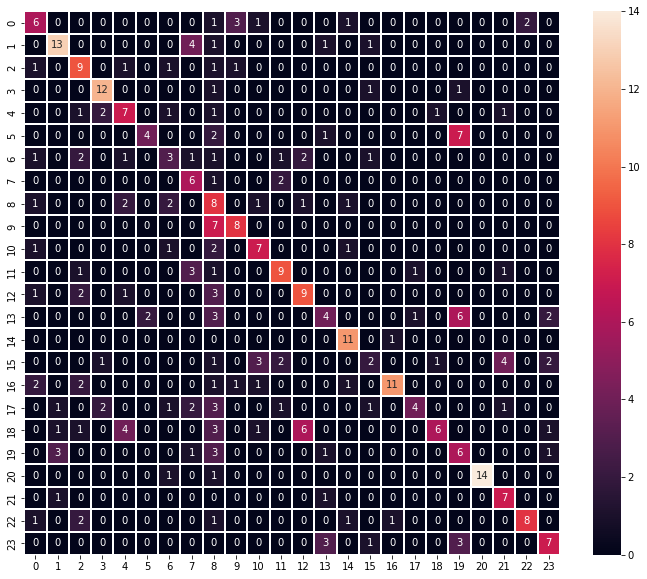

In [14]:
plt.figure(figsize = (12, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot = True, linewidths = 2, fmt="d", 
            )
plt.show()
